In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 相关关系图

In [2]:
df = pd.read_csv('../data/diamonds.csv').sample(frac=0.1).query("clarity in ['IF', 'VS1','VS2']")
df.head(2)

,carat,cut,clarity,price
16124,0.91,Ideal,VS2,6444
18112,1.19,Ideal,VS1,7328


1. 定性变量之间的关系

<AxesSubplot:xlabel='clarity', ylabel='cut'>

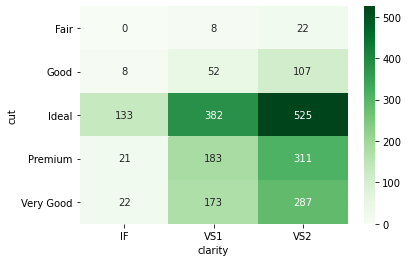

In [3]:
import seaborn as sns
res = pd.crosstab(df.cut, df.clarity)
sns.heatmap(res, cmap='Greens', annot=True, fmt='g') # 默认fmt为".2g"表示两位数以上使用科学计数法

2. 定性变量和定量变量间的关系

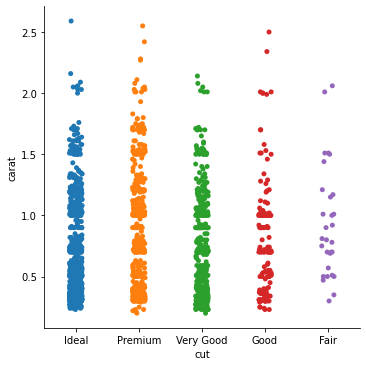

In [4]:
sns.catplot(x="cut", y="carat", data=df)

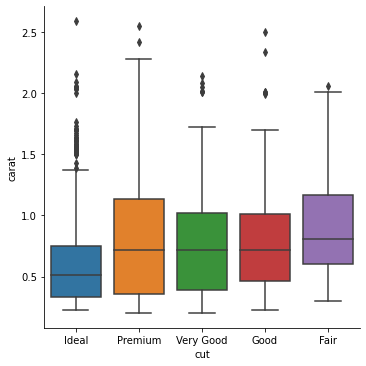

In [5]:
sns.catplot(x="cut", y="carat", data=df, kind="box") # 可指定hue="clarity"在该变量上画分类的箱线图

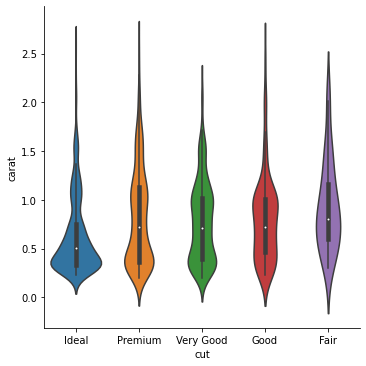

In [6]:
sns.catplot(x="cut", y="carat", data=df, kind="violin")

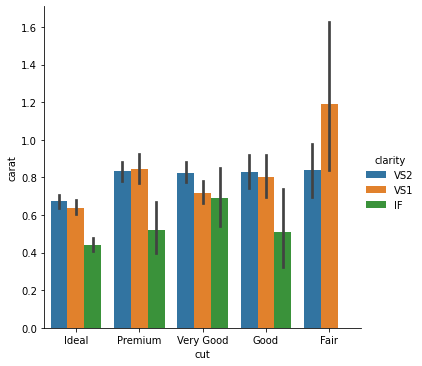

In [7]:
sns.catplot(x="cut", y="carat", data=df, kind="bar", hue="clarity")

3. 定量变量之间的关系

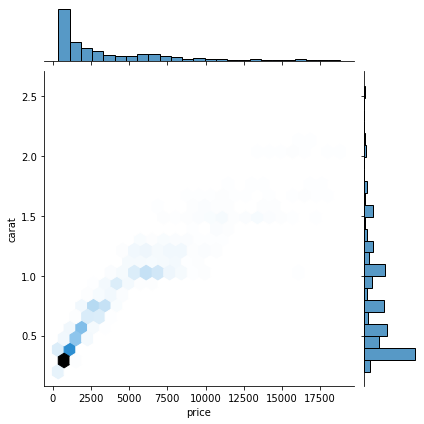

In [8]:
sns.jointplot(x=df["price"], y=df["carat"], kind='hex')

长尾分布可取对数

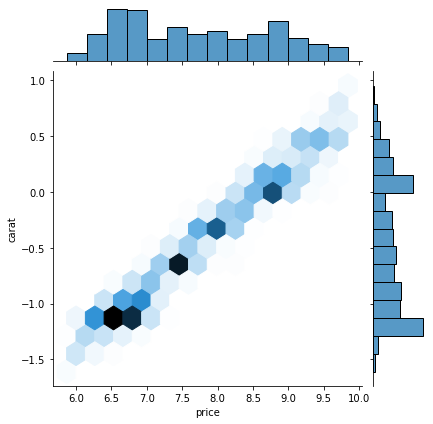

In [9]:
sns.jointplot(x=np.log(df["price"]), y=np.log(df["carat"]), kind='hex')

利用标准差截断

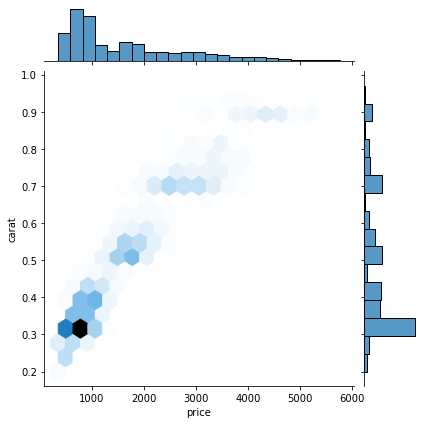

In [10]:
s1, s2 = df.price, df.carat
s1 = s1.mask((s1>(s1.median()+1*s1.std()))|(s1<(s1.median()-s1.std())))
s2 = s2.mask((s2>(s2.median()+1*s2.std()))|(s2<(s2.median()-s2.std())))
sns.jointplot(x=s1, y=s2, kind='hex')

利用分位数截断

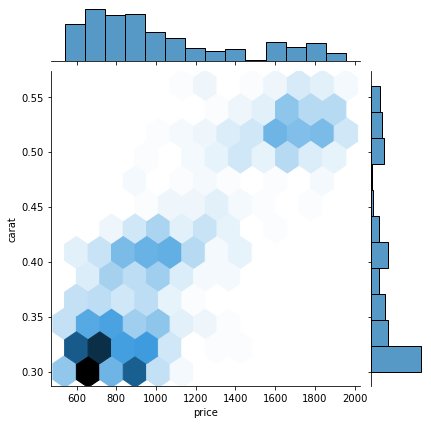

In [11]:
s1, s2 = df.price, df.carat
s1 = s1.mask((s1>(s1.quantile(0.5)))|(s1<(s1.quantile(0.05))))
s2 = s2.mask((s2>(s2.quantile(0.5)))|(s2<(s2.quantile(0.05))))
sns.jointplot(x=s1, y=s2, kind='hex')